## Demonstrating Image compression using PCA

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from sklearn.decomposition import PCA, IncrementalPCA

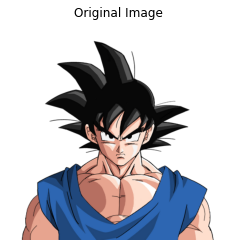

In [ ]:
image_raw = imread('goku.png')

gray_chan = False
if (image_raw.ndim) == 2:
    gray_chan = True

if not gray_chan:
    img = []
    for i in range(image_raw.shape[-1]):
        img.append(image_raw[:, :, i])
else:
    img = image_raw

plt.imshow(image_raw)
plt.title('Original Image')
plt.axis('off')
plt.show()

Number of componenets with more than 95% of varience :21


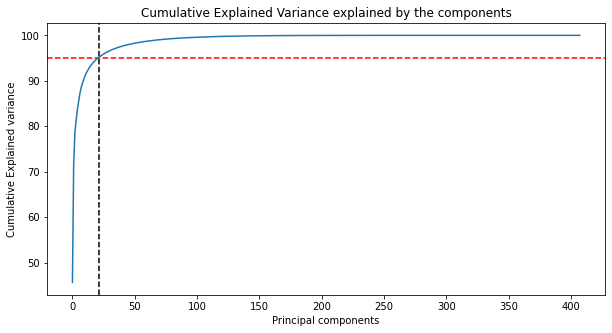

In [ ]:
pca = PCA()
pca.fit(img[0])

#cumulative variance
cum_variance = np.cumsum(pca.explained_variance_ratio_) * 100

#Get the number of PC whose variance > 95
k = np.argmax(cum_variance > 95)
print("Number of componenets with more than 95% of variance :" + str(k))

plt.figure(figsize = [10, 5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x = k, color = "k", linestyle = "--")
plt.axhline(y = 95, color = "r", linestyle = "--")
ax = plt.plot(cum_variance)

We can see that the sum of first 21 components out of 400+ retains about 95% of variance in the original image. 

Below we find the number of required components for which our image will contain 95%, 98%, 99% of variances of the original image.

In [ ]:
var = [95, 98, 99]
pca = PCA()

components = []
for v in var:
    cum_var_list = []
    for i in range(len(img)):
        pca.fit(img[i])
        cum_variance = np.cumsum(pca.explained_variance_ratio_) * 100
        cum_var_list.append(np.argmax(cum_variance > v))
    cum_var_list = np.asarray(cum_var_list)
    components.append(cum_var_list.max())

for q, v in zip(components,var):
    print("Optimum components for retaining {} % variance : {}".format(v,q))

Optimum components for retaining 95 % varience : 22
Optimum components for retaining 98 % varience : 48
Optimum components for retaining 99 % varience : 72


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


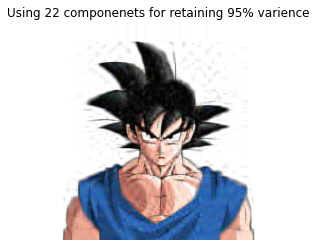

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


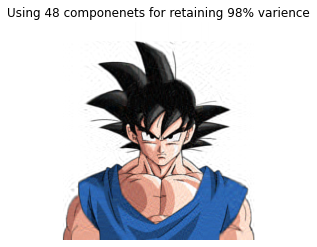

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


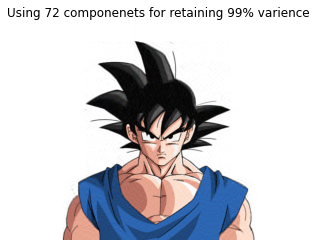

In [ ]:
#We now plot the compressed images with the required variances and its cumulative components

for k, v in zip(components,var):
    ipca = IncrementalPCA(n_components = k)
    plt.title('Using {} componenets for retaining {}% variance'.format(k, v))
    if not gray_chan:
        image_reconstructed = []
        for i in range(len(img)):
            x = ipca.inverse_transform(ipca.fit_transform(img[i]))
            image_reconstructed.append(x)
        im = np.stack(tuple(image_reconstructed), axis=-1)
        im = np.clip(im, 0, 1)   # jpg/jpeg: im = np.clip(im, 0, 255).astype('uint8')
    else:
        im = ipca.inverse_transform(ipca.fit_transform(img))
    plt.imshow(im)
    plt.axis('off')
    plt.show()

## Conclusion
We see that retaning 99% of the original image varience gives us an ouput very simillar to the original image while only using about 72 cumulative components out of 400+.